# Stability Analysis

This notebook recreates some ODE stability analysis for the model of yeast glycolytic oscillations (mygo) as shown/discussed in Lecture 8 slides 8-9 of the [Dynamical Modeling Methods for Systems Biology](https://www.coursera.org/learn/dynamical-modeling) course on Coursera.  

## Imports

In [3]:
# NumPy
import numpy as np
# PyPlot from Matplotlib
import matplotlib.pyplot as plt
# The PySB model simulator
from pysb.simulator import ScipyOdeSimulator
# The model.
from mygo import model

First we can setup the simulator:

In [12]:
# Timespan for the simulation in seconds
tspan = np.arange(0, 10*60*10) /10
# Timespand converted to minutes
tspan_min = tspan / 60
# Initialize the simulator
simulator = ScipyOdeSimulator(model, tspan=tspan)

## Oscillitory behavior

Now we can simulate the model and observe the oscillitory behavior. 

### "stable limit cycle"

When model parameter $K_m = 13$ `mygo` exhibits "stable limit cycle" behavior where the model oscillates indefinitely.

#### Concentrations vs. time:

In [13]:
param_values = np.array([param.value for param in model.parameters])
Km_mask = [param.name=='Km' for param in model.parameters]

In [14]:
param_values[Km_mask] = 13.

In [15]:
yfull_13 = simulator.run(param_values=param_values).all

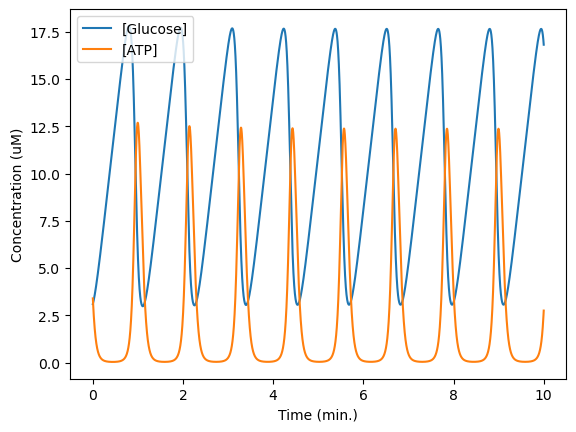

In [16]:
plt.plot(tspan_min, yfull_13['oG'], label='[Glucose]')
plt.plot(tspan_min , yfull_13['oATP'], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

#### phase-plane analysis

We can plot [Glucose] vs. [ATP] to generate a phase-plane plot:

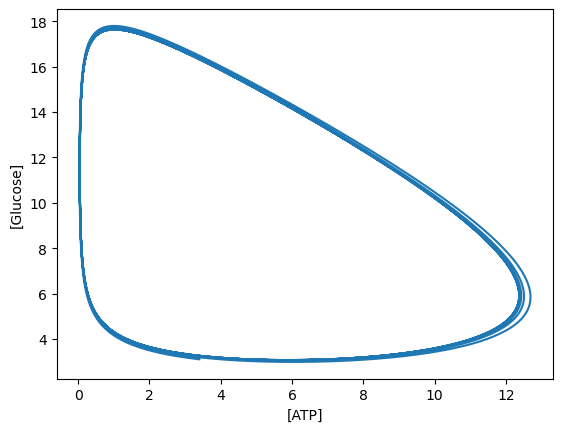

In [17]:
plt.plot(yfull_13['oATP'], yfull_13['oG'])
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.show()

### "stable fixed point"

When model parameter $K_m = 20$ `mygo` converges to a "stable fixed point", exhibiting damped oscillations up to fixed poit.

#### Concentrations vs. time:

In [19]:
param_values[Km_mask] = 20.

In [20]:
yfull_20 = simulator.run(param_values=param_values).all

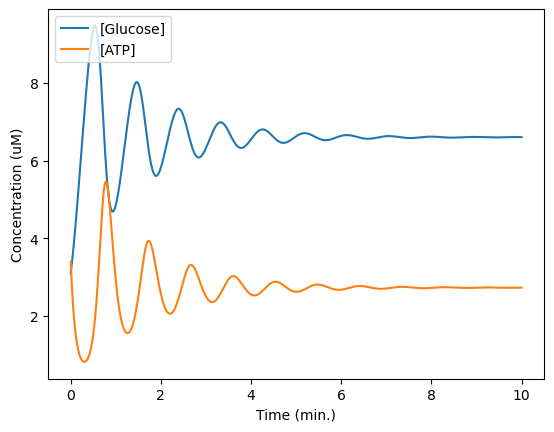

In [21]:
plt.plot(tspan_min, yfull_20['oG'], label='[Glucose]')
plt.plot(tspan_min , yfull_20['oATP'], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

#### phase-plane analysis

We can plot [Glucose] vs. [ATP] to generate a phase-plane plot:

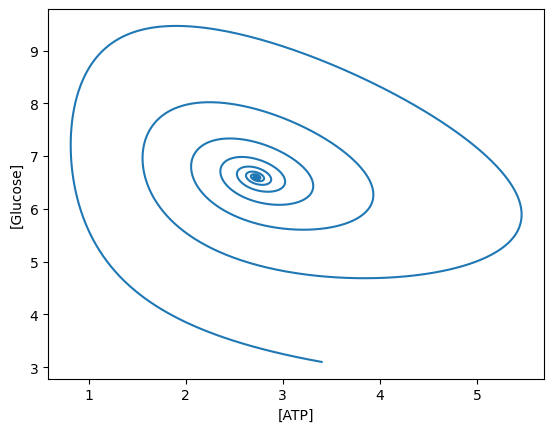

In [22]:
plt.plot(yfull_20['oATP'], yfull_20['oG'])
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.show()